In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 5})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [25]:
import pandas as pd

def trans_alist(alist):
    if type(alist) == int:
        return 0
    if type(alist) == float:
        return 0
    elif len(alist) > 0:
        thelist = alist.split("_")
        #print(alist)
        thelist = pd.Series(thelist)
        #thelist.fillna(0,inplace=True)
        #thelist = [float(i) for i in thelist if i != np.nan]
        #print(thelist)
        if thelist.sum() == 0:
            return 0
        else:
            #print(thelist.astype('float').sum(),thelist.count())
            return thelist.astype('float').sum()/thelist.count()
    else:
        return 0


In [26]:
from lifelines import CoxPHFitter
df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")

def get_cox(file):
    df_eigne_centrality = pd.read_csv(f"topolgy_property/{file}")
    df_eigne_centrality.set_index("pathway",inplace=True)
    df_eigne_centrality.fillna(0,inplace=True)
    df_ave= df_eigne_centrality.applymap(trans_alist).copy()
    #print(df_ave)
    df_os = pd.merge(df_ave.T.reset_index(),df_cl,how='left', left_on="index", right_on="RNA_ID")
    
    df_cox_os = pd.DataFrame()
    for i in df_os.columns[1:-13]:
        df_os1 = df_os[[i]+['OS', 'OS_CNSR']].copy()

        try:
            cph = CoxPHFitter()
            cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
            df_cox_os = pd.concat([df_cox_os,cph.summary])
        except:
            print("not working")
    return df_cox_os
    """
    df_cox_pfs = pd.DataFrame()
    for i in df_os.columns[1:-13]:
        df_os1 = df_os[[i]+['PFS', 'PFS_CNSR']].copy()
        try:
            cph = CoxPHFitter()
            cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
            df_cox_pfs = pd.concat([df_cox_pfs,cph.summary])
        except:
            print("not working")

    return df_cox_pfs
    """

term ="c2kegg_k10_postive_pathway"
close = get_cox(f"{term}_closeness_primaryNivo.txt")
core = get_cox(f"{term}_coreness_primaryNivo.txt")
ecce = get_cox(f"{term}_eccentricity_primaryNivo.txt")
edge = get_cox(f"{term}_edgebetween_primaryNivo.txt")
eige = get_cox(f"{term}_eigne_centrality_primaryNivo.txt")

term ="c2kegg_k10_negative_pathway"
close1 = get_cox(f"{term}_closeness_primaryNivo.txt")
core1 = get_cox(f"{term}_coreness_primaryNivo.txt")
ecce1 = get_cox(f"{term}_eccentricity_primaryNivo.txt")
edge1 = get_cox(f"{term}_edgebetween_primaryNivo.txt")
eige1 = get_cox(f"{term}_eigne_centrality_primaryNivo.txt")

In [27]:
term ="c2_pathway"
cate = "metaEver"
close1 = get_cox(f"{term}_closeness_{cate}.txt")
#core1 = get_cox(f"{term}_coreness_{cate}.txt")
#ecce1 = get_cox(f"{term}_eccentricity_{cate}.txt")
edge1 = get_cox(f"{term}_edgebetween_{cate}.txt")
eige1 = get_cox(f"{term}_eigne_centrality_{cate}.txt")

/tmp/ipykernel_1559832/1619521110.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ave= df_eigne_centrality.applymap(trans_alist).copy()
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_CIRCADIAN_RHYTHM_MAMMAL'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): 

not working


/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1676: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1728: RuntimeWarning: divide by zero encountered in divide
  denom = 1.0 / np.array([risk_phi])
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1730: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1732: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1737: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, beta) + weighted_average * log(denom).sum()
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1737: RuntimeWarning: invalid value encountered i

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column KEGG_SULFUR_METABOLISM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['OS_CNSR'].astype(bool)
>>> print(df.loc[events, 'KEGG_SULFUR_METABOLISM'].var())
>>> print(df.loc[~events, 'KEGG_SULFUR_METABOLISM'].var())

A very low variance means that the column KEGG_SULFUR_METABOLISM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.164. This may imply non-unique solutions to the maximum likeli

not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['OS_CNSR'].astype(bool)
>>> print(df.loc[events, 'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS'].var())
>>> print(df.loc[~events, 'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS'].var())

A very low variance means that the column KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM'

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column KEGG_SULFUR_METABOLISM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['OS_CNSR'].astype(bool)
>>> print(df.loc[events, 'KEGG_SULFUR_METABOLISM'].var())
>>> print(df.loc[~events, 'KEGG_SULFUR_METABOLISM'].var())

A very low variance means that the column KEGG_SULFUR_METABOLISM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.164. This may imply non-unique solutions to the maximum likeli

not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_PRIMARY_IMMUNODEFICIENCY'] have very low variance. This may harm convergence. 1) Are you using f

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_HISTIDINE_METABOLISM'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_TYROSINE_METABOLISM'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_PHENYLALANINE_METABOLISM'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to 

In [28]:
entro = pd.read_csv(f"c2kegg_pathway_edge_entropy_{cate}.txt",sep="\t",index_col=0)

df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")
df_os = pd.merge(entro.reset_index(),df_cl,how='left', left_on="sample", right_on="RNA_ID")
df_os.columns = ["index"] + df_os.columns.tolist()[1:]


df_entro_os = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['OS', 'OS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
        df_entro_os = pd.concat([df_entro_os,cph.summary])
    except:
        print("not working")
"""

df_entro_pfs = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['PFS', 'PFS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
        df_entro_pfs = pd.concat([df_entro_pfs,cph.summary])
    except:
        print("not working")
"""

/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__ini

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_CIRCADIAN_RHYTHM_MAMMAL'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_SULFUR_METABOLISM'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


not working


'\n\ndf_entro_pfs = pd.DataFrame()\nfor i in df_os.columns[1:-13]:\n    df_os1 = df_os[[i]+[\'PFS\', \'PFS_CNSR\']]\n    try:\n        cph = CoxPHFitter()\n        cph.fit(df_os1, duration_col=\'PFS\', event_col=\'PFS_CNSR\')\n        df_entro_pfs = pd.concat([df_entro_pfs,cph.summary])\n    except:\n        print("not working")\n'

In [29]:
gsva = pd.read_csv(f"./gsva_result/gsva_c2kegg_pathway_{cate}.txt",sep="\t")
gscl = pd.merge(gsva.T.reset_index(),df_cl,how='left', left_on="index", right_on="RNA_ID")


df_gsva_os = pd.DataFrame()
for i in gscl.columns[1:-13]:
    df_os1 = gscl[[i]+['OS', 'OS_CNSR']].copy()
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
        df_gsva_os = pd.concat([df_gsva_os,cph.summary])
    except:
        print("not working")
"""
df_gsva_pfs = pd.DataFrame()
for i in gscl.columns[1:-13]:
    df_os1 = gscl[[i]+['PFS', 'PFS_CNSR']].copy()
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
        df_gsva_pfs = pd.concat([df_gsva_pfs,cph.summary])
    except:
        print("not working")
"""

'\ndf_gsva_pfs = pd.DataFrame()\nfor i in gscl.columns[1:-13]:\n    df_os1 = gscl[[i]+[\'PFS\', \'PFS_CNSR\']].copy()\n    try:\n        cph = CoxPHFitter()\n        cph.fit(df_os1, duration_col=\'PFS\', event_col=\'PFS_CNSR\')\n        df_gsva_pfs = pd.concat([df_gsva_pfs,cph.summary])\n    except:\n        print("not working")\n'

from matplotlib_venn import venn2
a = close[close["p"]<0.05].index.tolist() + close1[close1["p"]<0.05].index.tolist()
#b = core[core["p"]<0.05].index.tolist()
c = ecce[ecce["p"]<0.05].index.tolist() + ecce1[ecce1["p"]<0.05].index.tolist()
d = edge[edge["p"]<0.05].index.tolist() + edge1[edge1["p"]<0.05].index.tolist()
e = eige[eige["p"]<0.05].index.tolist() + eige1[eige1["p"]<0.05].index.tolist()
f = df_gsva_os[df_gsva_os["p"]<0.05].index.tolist()
f1 = df_gsva_pfs[df_gsva_pfs["p"]<0.05].index.tolist()
f1

In [30]:
a = close1[close1["p"]<0.05].index.tolist()
#b = core[core["p"]<0.05].index.tolist()
#c = ecce1[ecce1["p"]<0.05].index.tolist()
d = edge1[edge1["p"]<0.05].index.tolist()
e = eige1[eige1["p"]<0.05].index.tolist()
#f = df_gsva_os[df_gsva_os["p"]<0.05].index.tolist()

f1 = df_gsva_os[df_gsva_os["p"]<0.05].index.tolist()
g = df_entro_os[df_entro_os["p"]<0.05].index.tolist()
"""
f1 = df_gsva_pfs[df_gsva_pfs["p"]<0.05].index.tolist()
g = df_entro_pfs[df_entro_pfs["p"]<0.05].index.tolist()
"""
#f1

'\nf1 = df_gsva_pfs[df_gsva_pfs["p"]<0.05].index.tolist()\ng = df_entro_pfs[df_entro_pfs["p"]<0.05].index.tolist()\n'

!pip install venn

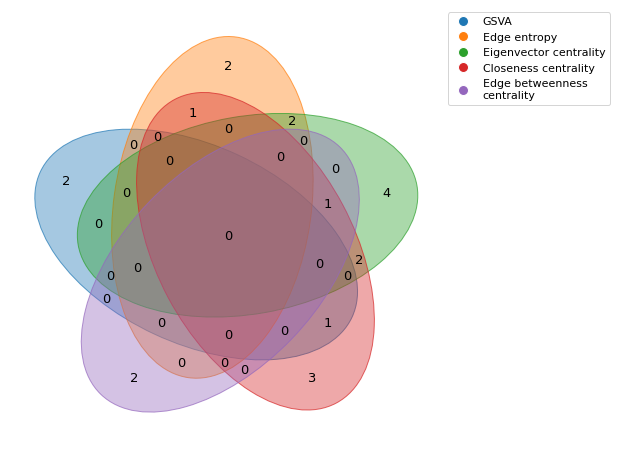

In [31]:
from venn import venn

sets = {
    'GSVA': set(f1),
    'Edge entropy': set(g),
    'Eigenvector centrality': set(e),
    'Closeness centrality': set(a),
    'Edge betweenness\ncentrality': set(d),
    }

# Predefine colors for the sets
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Generate the Venn diagram with predefined colors
venn_plot = venn(sets, cmap=colors)

# Create custom handles for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]
labels = sets.keys()
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot

plt.savefig(f'f5_{term}_{cate}_os_venn.tif',dpi=600)
plt.savefig(f'f5_{term}_{cate}_os_venn.svg',dpi=600)

#plt.savefig(f'f5_{term}_{cate}_pfs_venn.tif',dpi=600)
#plt.savefig(f'f5_{term}_{cate}_pfs_venn.svg',dpi=600)
plt.show()

from matplotlib_venn import venn2
from venny4py.venny4py import *

#dict of sets #Closeness centrality
"""
sets = {
    'GSVA': set(f1),
    'Edge entropy': set(g),
    'Eigenvector centrality': set(e),
    'Closeness centrality': set(a),
    }
"""
sets = {
    'Edge betweenness': set(d),
    'Edge entropy': set(g),
    'Eigenvector centrality': set(e),
    'Closeness centrality': set(a),
    }

venny4py(sets=sets)
plt.tight_layout()
#plt.savefig(f'f5_{term}_{cate}_os_venn.tif',dpi=600)
#plt.savefig(f'f5_{term}_{cate}_os_venn.svg',dpi=600)
#plt.savefig(f'f5_{term}_{cate}_pfs_venn.svg',dpi=600)

from matplotlib_venn import venn2
from venny4py.venny4py import *

#dict of sets #Closeness centrality
sets = {
    'GSVA': set(f1),
    'Eigenvector centrality': set(e),
    'Closeness centrality': set(a),
    'Edge betweenness\ncentrality': set(d),
    }
    
venny4py(sets=sets)
plt.tight_layout()
plt.savefig(f'f5_{term}_{cate}_pfs_venn.tif',dpi=600)
plt.savefig(f'f5_{term}_{cate}_pfs_venn.svg',dpi=600)

#for os
print(set(f).intersection(e)) # Eigenvector centrality
print(set(f).intersection(c)) # Eccentric centrality
print(set(f).intersection(d)) # Betweenness centrality

#for pfs
print(set(f1).intersection(e)) # Eigenvector centrality
print(set(f1).intersection(c)) # Eccentric centrality
print(set(f1).intersection(d)) # Betweenness centrality